In [1]:
import types
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 11})
# PyTorch
import torch
import torchvision
import torchmetrics

In [2]:
import sys
sys.path.append('../src/')

%load_ext autoreload
%autoreload 2
# Importing our custom module(s)
import losses
import utils

In [3]:
experiments_directory = '{home_dir}/data-emphasized-ELBo/experiments/train_eval_comparison'
model_name1 = 'l2-sp_kappa=23528.522_lr_0=0.01_n=1000_random_state=1001'
model_name2 = 'l2-sp_kappa=23528.522_lr_0=0.001_n=1000_random_state=1001'
temp_df1 = pd.read_csv(f'{experiments_directory}/{model_name1}.csv')
temp_df2 = pd.read_csv(f'{experiments_directory}/{model_name2}.csv')

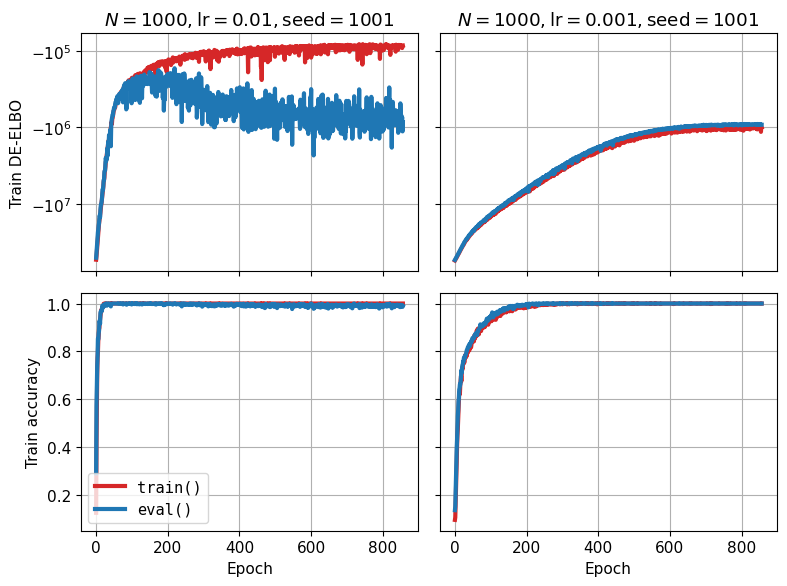

In [4]:
kappa, N = 23528.522, 1000

ncols, nrows = 2, 2
fig, axs = plt.subplots(figsize=(4*ncols, 3*nrows), ncols=ncols, nrows=nrows, sharex=True, sharey='row')

axs[0,0].set_title(r'$N=1000, \text{lr}=0.01, \text{seed}=1001$')
axs[0,0].plot(temp_df1.epoch, kappa * N * -temp_df1.train_nll - temp_df1.train_kl, color='#D62728', linewidth=3)
axs[0,0].plot(temp_df1.epoch, kappa * N * -temp_df1.train_eval_nll - temp_df1.train_eval_kl, color='#1F77B4', linewidth=3)
axs[0,0].set_yscale('symlog')
axs[0,0].set_ylabel(r'Train DE-ELBO')
axs[0,0].grid()

axs[0,1].set_title(r'$N=1000, \text{lr}=0.001, \text{seed}=1001$')
axs[0,1].plot(temp_df2.epoch, kappa * N * -temp_df2.train_nll - temp_df2.train_kl, color='#D62728', linewidth=3)
axs[0,1].plot(temp_df2.epoch, kappa * N * -temp_df2.train_eval_nll - temp_df2.train_eval_kl, color='#1F77B4', linewidth=3)
axs[0,1].set_yscale('symlog')
axs[0,1].grid()

axs[1,0].plot(temp_df1.epoch, temp_df1.train_acc, color='#D62728', label='train()', linewidth=3)
axs[1,0].plot(temp_df1.epoch, temp_df1.train_eval_acc, color='#1F77B4', label='eval()', linewidth=3)
axs[1,0].set_xlabel('Epoch')
axs[1,0].set_ylabel('Train accuracy')
axs[1,0].legend(loc='lower left', prop={'family': 'monospace'})
axs[1,0].grid()

axs[1,1].plot(temp_df2.epoch, temp_df2.train_acc, color='#D62728', linewidth=3)
axs[1,1].plot(temp_df2.epoch, temp_df2.train_eval_acc, color='#1F77B4', linewidth=3)
axs[1,1].set_xlabel('Epoch')
axs[1,1].grid()

fig.tight_layout()
fig.savefig('train_eval_comparison.pdf', bbox_inches='tight')
plt.show()